###                            Customer Life Time Value (CLTV) Prediction 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv("online_retail.csv",encoding= 'unicode_escape')

C:\Users\Jesh\anaconda3\envs\venv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df['Country']

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
532614            France
532615            France
532616            France
532617            France
532618            France
Name: Country, Length: 532619, dtype: object

In [7]:
data = df.drop_duplicates()

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


In [9]:
data['Country'].nunique()

38

<AxesSubplot:>

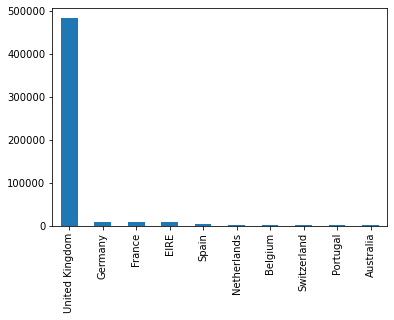

In [10]:
#Visualizing top 10 countries distribution
data.Country.value_counts()[:10].plot(kind='bar')

In [11]:
#Performing the analysis for UK as it accounts for most of the data
data = data[data['Country'] == 'United Kingdom']

In [12]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
532599,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,9/12/2011 12:31,1.95,15804.0,United Kingdom
532600,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,9/12/2011 12:49,2.95,13113.0,United Kingdom
532601,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,9/12/2011 12:49,1.25,13113.0,United Kingdom
532602,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,9/12/2011 12:49,8.95,13113.0,United Kingdom


In [13]:
# Filtering for columns that are required for the calculation of CLTV
data = data[data['Quantity']>0]
data = data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [14]:
data['TotalPurchase'] = data['Quantity'] * data['UnitPrice']

In [44]:
data['InvoiceDate'] = data['InvoiceDate'].str.replace("/","-")
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
data_new = data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                             'InvoiceNo': lambda num: len(num),
                                             'Quantity': lambda quant: quant.sum(),
                                             'TotalPurchase': lambda price: price.sum()})

In [47]:
data_new

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4413,25288,33053.19
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34
...,...,...,...,...
18280.0,0,10,45,180.60
18281.0,0,7,54,80.82
18282.0,118,12,103,178.05


In [48]:
# Changing the name of columns
data_new.columns=['days', 'transactions', 'units', 'spent_money']
data_new.head()

,days,transactions,units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4413,25288,33053.19
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


##### Formula to calculate CLTV
CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin                                           
Average Order Value = Customer Value / Purchase Frequency

In [50]:
#Calculating Purchase Frequency
purchase_frequency=sum(data_new['transactions'])/data_new.shape[0]

In [51]:
# Repeat Rate
repeat_rate=data_new[data_new.transactions > 1].shape[0]/data_new.shape[0]
#Churn Rate
churn_rate=1-repeat_rate
purchase_frequency,repeat_rate,churn_rate

(89.06579954093344, 0.9818923743942872, 0.018107625605712774)

In [52]:
# Average Order Value
data_new['avg_order_value']=data_new['spent_money']/data_new['transactions']

In [54]:
# Profit Margin (assuming 25% profit)
data_new['profit_margin']= data_new['spent_money']*0.25
# Customer Value
data_new['CLTV']= data_new['avg_order_value']*(purchase_frequency)/churn_rate
#Customer Lifetime Value
data_new['cust_lifetime_value']=data_new['CLTV']*data_new['profit_margin']

#### CLTV Prediction Model

In [56]:
# Extracting month and year from InvoiceDate.
data['month_yr'] = data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y')) 

In [57]:
sale=data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()

In [58]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)

In [59]:
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01
2,12748.0,1065.57,896.16,4185.00,999.00,381.59,417.12,1081.45,1923.62,1165.37,2223.17,10453.69,2199.30,6062.15,31987.62
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34


#### Taking last six-months data as independent variables and total revenue as a dependent variable 

In [62]:
X=sale[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y=sale[['CLV']]

In [71]:
#split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

# instantiation
linreg = LinearRegression()

# fitting the model to the training data
linreg.fit(X_train, y_train) 

# make predictions on the testing set
y_pred = linreg.predict(X_test) 

In [70]:
print('R-Square:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square: 0.9599118377356094
MAE: 559.6028498229856
MSE 2534429.9467723644
RMSE: 1591.9893048548927
